# Q&A Activity Question Week -10

## Question

Do the following on the dataset:
    
**1. Load the data into the pandas environment and identify some basic details of the
dataset.**

**2. Reset the index as "name" as the index.**

**3. Select rows for specific names Jack Morgan and Josh wills.**

**4. Select data for multiple values "Sales" and “Finance”.**

**5. Display employee who has more than 700 performance score.**

**6. Display employee who has more than 500 and less than 700 performance score.**

**7. Check and handle missing values in the dataset.**

**8. Check the outliers and handle outliers in performance score using Percentiles.**

**9. Check the gender column and do Dummy encoding.**

**10.Do the standard scaling on the feature performance score.**

## Answer

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [40]:
data=pd.read_csv('employee.csv')
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [41]:
data.shape

(9, 7)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


## 2. Reset the index as "name" as the index.


In [7]:
data=pd.read_csv('employee.csv',index_col='name')
data


,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## 3. Select rows for specific names Jack Morgan and Josh wills.

In [8]:
data.iloc[[2,7]]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


## 4. Select data for multiple values "Sales" and “Finance”.


In [9]:
data['department']

name
Allen Smith      Operations
S Kumar             Finance
Jack Morgan         Finance
Ying Chin             Sales
Dheeraj Patel    Operations
Satyam Sharma         Sales
James Authur     Operations
Josh Wills          Finance
Leo Duck              Sales
Name: department, dtype: object

In [10]:
data[data['department']!='Operations']

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## 5. Display employee who has more than 700 performance score.

In [11]:
data[data['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## 6. Display employee who has more than 500 and less than 700 performance score.

In [12]:
data[(data['performance_score']>500) & (data['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


## 7. Check and handle missing values in the dataset.


In [13]:
#Check for the null values present in each column of  dataset
data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [14]:
# found missing values in age,income and gender columns. 

1.gender

In [15]:
data['gender']

name
Allen Smith      NaN
S Kumar            F
Jack Morgan        M
Ying Chin          F
Dheeraj Patel      F
Satyam Sharma    NaN
James Authur       F
Josh Wills         F
Leo Duck           M
Name: gender, dtype: object

In [16]:
# handling missing values in gender using 'M'
data['gender']=data['gender'].fillna('M')

2.income

<AxesSubplot:ylabel='Frequency'>

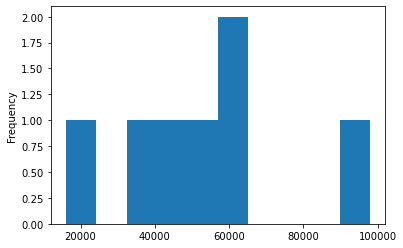

In [17]:
# plotting histogram to under stand the distribution
data['income'].plot(kind='hist')

In [18]:
# handling missing values in income using median since the distribution is skewed
data['income']=data['income'].fillna(data['income'].median())

3.age

<AxesSubplot:ylabel='Frequency'>

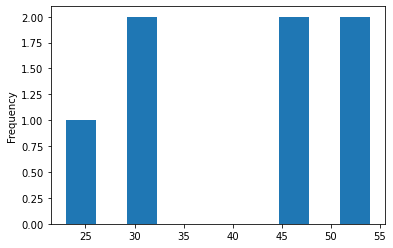

In [19]:
# plotting histogram to under stand the distribution
data['age'].plot(kind='hist')

In [20]:
data['age']=data['age'].fillna(data['age'].median())

In [21]:
data.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

**There is no null values anymore.**

## 8. Check the outliers and handle outliers in performance score using Percentiles.

In [22]:
data.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

<AxesSubplot:>

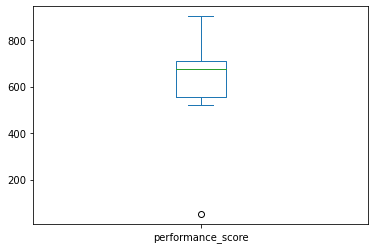

In [23]:
# plotting boxplot of performance_score
data['performance_score'].plot(kind='box')

**Outlier spotted in the performance_score column**

In [24]:
# Executing code to reduce outlier
Q1 = np.percentile(data['performance_score'], 25, interpolation = "midpoint")
Q2 = np.percentile(data['performance_score'], 50, interpolation = "midpoint")
Q3 = np.percentile(data['performance_score'], 75, interpolation = "midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
print('lower limit is:',low_lim)
print('upper limit is:',upper_lim)
outlier=[]
for x in data['performance_score']:
    if((x>upper_lim) or (x<low_lim)):
        outlier.append(x)
print('outliers are:',outlier) 
ind1=data['performance_score']<low_lim
data.loc[ind1].index

lower limit is: 323.5
upper limit is: 943.5
outliers are: [53]


Index(['James Authur'], dtype='object', name='name')

In [25]:
# dropping the index contain outlier
data.drop(['James Authur'],inplace=True)

<AxesSubplot:>

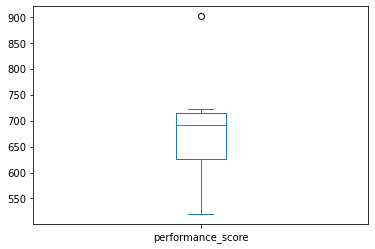

In [26]:
# boxplot after reducing outlier
data['performance_score'].plot(kind='box')

##  9. Check the gender column and do Dummy encoding.

In [27]:
encoded_data=pd.get_dummies(data,columns=['gender'])
encoded_data

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,723,0,1
S Kumar,45.0,16000.0,Finance,G0,520,1,0
Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
Ying Chin,45.0,65000.0,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0
Satyam Sharma,45.0,62000.0,Sales,G3,649,0,1
Josh Wills,54.0,52000.0,Finance,G3,901,1,0
Leo Duck,23.0,98000.0,Sales,G4,709,0,1


* **Here,male is coverted to 0 and female to 1 after encoding.**

## 10.Do the standard scaling on the feature performance score.

In [30]:
# setting a variable x for scaling
x=data['performance_score']
x.describe()

count      8.00000
mean     680.37500
std      116.16729
min      520.00000
25%      625.75000
50%      691.50000
75%      714.00000
max      901.00000
Name: performance_score, dtype: float64

<AxesSubplot:ylabel='Frequency'>

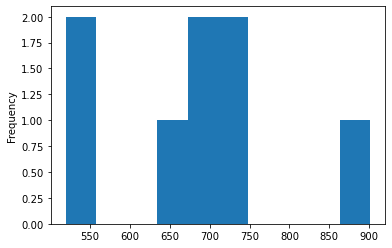

In [31]:
# plotting histogram of x
x.plot(kind='hist')

In [36]:
# performing standard scaling using sklearn
from sklearn import preprocessing

standardisation=preprocessing.StandardScaler()
x=x.values.reshape(-1,1)
x=standardisation.fit_transform(x)
x=pd.DataFrame(x)
x.describe()


,0
count,8.000000e+00
mean,4.857226e-17
std,1.069045e+00
min,-1.475872e+00
25%,-5.026938e-01
50%,1.023793e-01
75%,3.094385e-01
max,2.030331e+00


<AxesSubplot:ylabel='Frequency'>

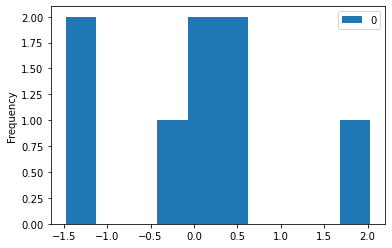

In [37]:
# histogram shows the distribution after feature reduction
x.plot(kind='hist')

In [ ]:
Submitted by :Group 09,DSA Batch03